# Cat Butts

how and why they stink

In [53]:
import skbio

fecal_hosts = set()
for host in open('hosts/SpeciesListFecal.txt') :
    fecal_hosts.add(host.strip().replace('_',' '))

gland_hosts = set()
for host in open('hosts/SpeciesListAnalSac.txt') :
    gland_hosts.add(host.strip().replace('_',' '))    
    
tree = skbio.tree.TreeNode.read('hosts/carnivores.tree')

fecal_tree = tree.shear(fecal_hosts)
gland_tree = tree.shear(gland_hosts)

fecal_tree.write( 'hosts/carnivores_fecal.tree' )
gland_tree.write( 'hosts/carnivores_gland.tree' )

'hosts/carnivores_gland.tree'

In [59]:
from ete2 import Tree, TreeStyle, NodeStyle
from numpy import linspace

ts = TreeStyle()
ts.mode = 'r'
#ts.mode = 'c'
ts.show_leaf_name = True
ts.branch_vertical_margin = 10
#ts.scale = 1000000

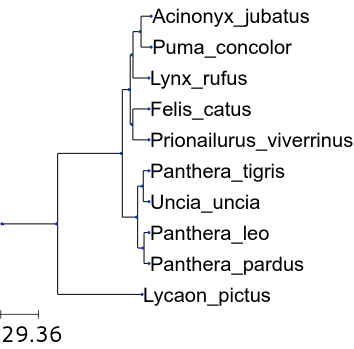

In [60]:
t = Tree('hosts/carnivores_fecal.tree')
t.render("%%inline", w=100, units="mm", tree_style=ts)

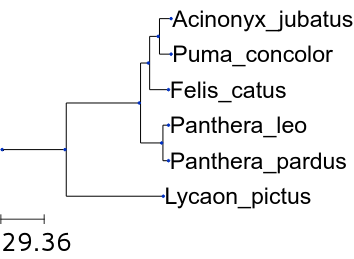

In [62]:
t = Tree('hosts/carnivores_gland.tree')
t.render("%%inline", w=100, units="mm", tree_style=ts)